# Logistic Regression, Multinomial Naive Bias (Compare on the same database)

In [153]:
# iris = load_iris() 
# x = iris.data 
# y = iris.target 


# print("data shape:" , x.shape)
# print("number of samples:", x.shape[0])
# print("number of features:", x.shape[1])
# print("classes: ", iris.target_names)

import pandas as pd
# Load dataset from CSV file
data = pd.read_csv('iris_data.csv')

# Separate features (X) and target (y)
# Assuming the target column name is 'species' or similar
x = data.iloc[:, :-1]     # all columns except last
y = data.iloc[:, -1]      # last column

# Display dataset information
print("data shape:", x.shape)
print("number of samples:", x.shape[0])
print("number of features:", x.shape[1])

print("classes:", y.unique())

data shape: (149, 4)
number of samples: 149
number of features: 4
classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


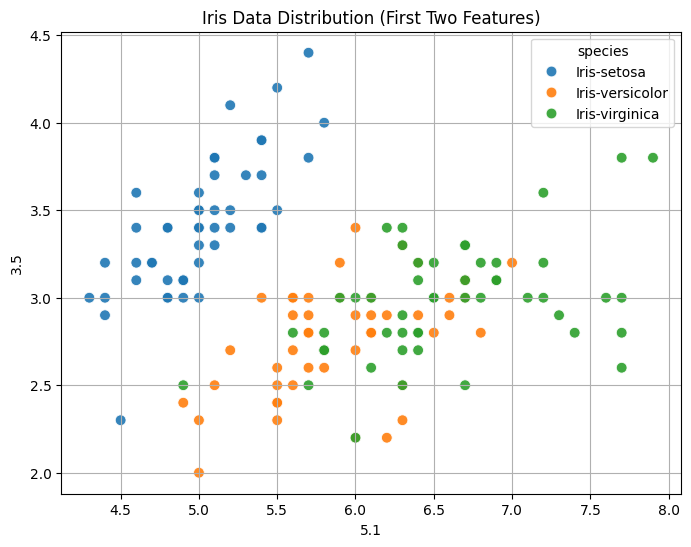

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features and target into one DataFrame for easy plotting
plot_data = x.copy()
plot_data['species'] = y

# Scatter plot for first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_data,
    x=plot_data.columns[0],
    y=plot_data.columns[1],
    hue='species',
    s=60,
    alpha=0.9
)
plt.title('Iris Data Distribution (First Two Features)')
plt.xlabel(plot_data.columns[0])
plt.ylabel(plot_data.columns[1])
plt.grid(True)
plt.show()


In [155]:
from sklearn.model_selection import train_test_split 

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

# x_train.shape, x_test.shape, y_train.shape, y_test.shape


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Show resulting shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(119, 4) (30, 4) (119,) (30,)


In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [157]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [158]:
lr_prediction = lr_model.predict(x_test_scaled)

In [159]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, lr_prediction)
lr_acc

1.0

In [160]:
from sklearn.metrics import classification_report

print("acc:", lr_acc * 100)

print("classification report:")

print(classification_report(
    y_test, 
    lr_prediction, 
    target_names=y.unique()
))


acc: 100.0
classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [161]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:" )

print(confusion_matrix(y_test, lr_prediction))

Confusion matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


In [162]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [163]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [164]:
nb_prediction = nb_model.predict(x_test)

In [165]:
nb_model_acc = accuracy_score(y_test, nb_prediction)

In [166]:
print("acc: ", nb_model_acc * 100)

print("classification report:")
print(classification_report(y_test, nb_prediction, target_names=y.unique()))

acc:  73.33333333333333
classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.67      0.55      0.60        11
 Iris-virginica       0.62      0.73      0.67        11

       accuracy                           0.73        30
      macro avg       0.76      0.76      0.76        30
   weighted avg       0.74      0.73      0.73        30



In [167]:
print("Confusion matrix:" )

print(confusion_matrix(y_test, nb_prediction))

Confusion matrix:
[[8 0 0]
 [0 6 5]
 [0 3 8]]
